# Geodesics with Sage Manifolds

Lazaros Souvaitzis

Aristotle University of Thessaloniki

May 2020

For the course of "Astrophysics" (Masters program on computational physics)

In [1]:
version()

'SageMath version 8.9, Release Date: 2019-09-29'

In [2]:
%display latex

## Definition of Manifold and metric
We define the spacetime manifold $M$ and the standard Schwarzschild coordinates on it:

In [3]:
M = Manifold(4,'M', structure='Lorentzian',latex_name='\mathcal{M}')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

For graphical purposes, we introduce $\mathbb{R}^3$ and some coordinate map $M\to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', latex_name=r'\mathbb{R}^3')
X3.<x,y,z> = R3.chart()
to_R3 = M.diff_map(R3, {(X, X3): [r*sin(th)*cos(ph), 
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Next, we define the metric (Schwarzschild here):

In [5]:
g = M.lorentzian_metric('g')
m = var('m'); assume(m >= 0)
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [6]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

## Christoffel symbols

In [7]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Checking the symmetry between the two lower indices

In [8]:
g.christoffel_symbols()[0,0,1] == g.christoffel_symbols()[0,1,0]

True

## Riemann Tensor

In [9]:
g.riemann().display_comp()

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_r,r,t = 2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_th,th,t = m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^t_ph,ph,t = m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_t,r,t = 2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_th,th,r = m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^r_ph,ph,r = m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_t,th,t = -(2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_r,th,r = m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^th_ph,ph,th = -2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_t,ph,t = -(2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_r,ph,r = m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r 
Riem(g)^ph_th,ph,th = 2*m/r

## Geodesics
We have to define initial conditions in order  to calculate a geodesic. Specifically, we pick a starting point and an initial tangent vector (has to do with the embedded chart 'inside' a 4-Manifold) :

In [10]:
p0 = M.point((0, 8*m, pi/2, 1e-12), name='p_0')
v0 = M.tangent_space(p0)((1.297513, 0, 0, 0.0640625/m), name='v_0')
# v0 = M.tangent_space(p0)((1.297513, 0, 0.024/m, 0.06/m), name='v_0') use it for inclined orbit
v0.display()

v_0 = 1.29751300000000 d/dt + 0.0640625000000000/m d/dph

In [11]:
v0.parent()

Tangent space at Point p_0 on the 4-dimensional Lorentzian manifold M

This vector has to be timelike : $u_a u^a=-1$ . We can check that by :

In [12]:
g.at(p0)(v0, v0)

-0.999998738876750

Next we define an affine parameter $S$ (proper time) and its range. We ask for the numerical integration of the geodesic, providing some numerical value for the parameter $m$, and then plot it in terms of the Cartesian chart:

In [13]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 1500), v0); geod
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()  

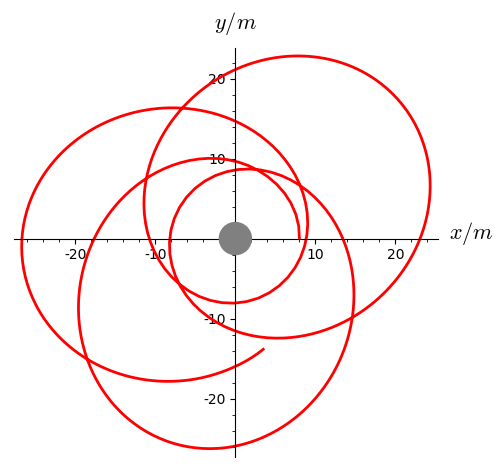

In [14]:
graph = geod.plot_integrated(chart=X3, mapping=to_R3, ambient_coords=(x,y), plot_points=500,thickness=2, label_axes=False)  
graph += circle((0,0), 2, fill=True, edgecolor='grey', facecolor='grey')
show(graph, aspect_ratio=1, axes_labels=[r'$x/m$', r'$y/m$'])

We can also produce the 3D plot, which provides some nice (visual) features.

In [15]:
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500, 
                             thickness=2, label_axes=False)           # the geodesic
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1}) # the starting point
graph += sphere(size=2, color='grey')                                 # the event horizon
# show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)
show(graph, viewer='threejs', online=True)

Graphics3d Object

We can access some details about the system solved to get the geodesic:

In [16]:
geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold M equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold M, and integrated over the Real interval (0, 1500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold M with coordinates [0, 8*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M with components [1.29751300000000, 0, 0, 0.0640625000000000/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds = -2*(Dph*Dth*

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M,
 Chart (M, (t, r, th, ph))]

We repeat the previous procedure, this time trying to find an off-equitorial orbit.

In [17]:
p0 = M.point((0, 8*m, pi/2, 1e-12), name='p_0')
v0 = M.tangent_space(p0)((1.297513, 0, 0.024/m, 0.06/m), name='v_0')
v0.display()

v_0 = 1.29751300000000 d/dt + 0.0240000000000000/m d/dth + 0.0600000000000000/m d/dph

In [18]:
g.at(p0)(v0, v0)

-0.995390988876750

In [19]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 1500), v0); geod
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate() 

In [20]:
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500, 
                             thickness=2, label_axes=False)           # the geodesic
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1}) # the starting point
graph += sphere(size=2, color='grey')                                 # the event horizon
# show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)
show(graph, viewer='threejs', online=True)

Graphics3d Object

### Radial null geodesics in Schwarzschild Spacetime

Radial : $\theta = const.$ and $\phi = const.$ . So we set $d\theta=0$ and $d\phi=0$ in the metric and search for $ ds^2 = g_{\mu\nu}d\chi^{\mu}d\chi^{\nu} = 0 $ : 

$$ ds^2 = 0 \Longleftrightarrow dt^2 = \frac{dr^2}{(1-2m/r)^2}
 \Longleftrightarrow dt = \pm\frac{dr}{1-2m/r} $$ 
 
The above is easily intergrated :

$$ t = \pm r \pm 2m\cdot ln|\frac{r}{2m} - 1| + const. $$

Two families of curves: (+,-) $\Longrightarrow$ (outgoing,ingoing).

Introducing the tortoise coordinate : 

$$ r_{*} = r + 2m\cdot ln|\frac{r}{2m} - 1| ,$$

we ca rewrite the above equations.

The outgoing family: $t = r_{*}+u \Longrightarrow u=t-r_{*}$

In [24]:
var('u')
outgeod = M.curve({X: [r + 2*m*ln(abs(r/(2*m)-1)) + u, r, pi/2, pi]}, (r, 0, +Infinity))
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)

The ingoing family: $t = -r_{*}+\upsilon \Longrightarrow \upsilon =t+r_{*}$

In [26]:
var('v',latex_name='\upsilon')
ingeod = M.curve({X: [-r - 2*m*ln(abs(r/(2*m)-1)) + v, r, pi/2, pi]}, (r, 0, +Infinity))
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)

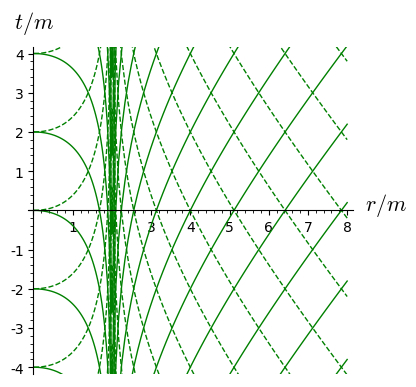

In [27]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += outgeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

and we can also add some light cones:

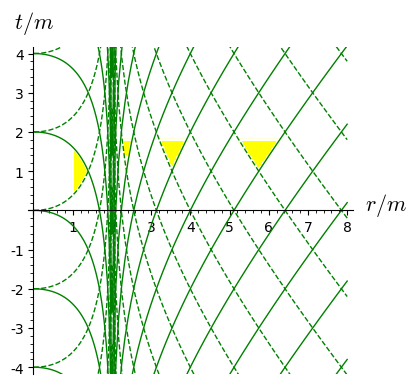

In [28]:
fout(r,u) = r + 2*ln(abs(r/2-1)) + u
fin(r,v) = -r - 2*ln(abs(r/2-1)) + v

def cone1(r,t):
    return t<fout(r,2) and t>fin(r,0) and r>1
def cone2(r,t):
    return t>fout(r,2) and t>fin(r,0) and t<1.8
def cone3(r,t):
    return t>fout(r,-2) and t>fin(r,4) and t<1.8
def cone4(r,t):
    return t>fout(r,-6) and t>fin(r,8) and t<1.8

graph += region_plot(cone1, (1,1.99), (0,1.99), incol='yellow')
graph += region_plot(cone2, (2.01,8), (0,1.99), incol='yellow')
graph += region_plot(cone3, (2.01,8), (0,1.99), incol='yellow')
graph += region_plot(cone4, (2.01,8), (0,1.99), incol='yellow')

show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)